# Assignment 1
**In this assignment we are going to work on some basic SQL as well as python plotting.**  Along with this notebook should be a `data.csv` file with data you are to work with as well as a `README.txt` describing the data file.


## Imports

In [1]:
# imports here
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Basic Python

### Question 1 (15 points):
**Define a function `is_palindrome()` in Python that recognizes palindromes (i.e. words that look the same written backwards). For example, `is_palindrome("radar")` should `return True`. `is_palindrome("CS5644")` should `return False`. **

Points to note : 
1.	You should be writing a function that takes a string and outputs a boolean
2.	Edge cases such as empty string, longer phrases, multiple line phrases, or case-sensitivity need not be checked.
3.	Demonstrate with 5 examples (3 positive, 2 negative). 


In [2]:
#your code here
def is_palindrome(x):
    s = x[::-1]
    return s == x

print(is_palindrome("radar"))
print(is_palindrome("cs5644"))
print(is_palindrome("12321"))
print(is_palindrome("ABCDEFG"))
print(is_palindrome("AbCbA"))

True
False
True
False
True


### Question 2 (15 points) 
In cryptography, a Caesar cipher is a very simple encryption technique in which each letter in the plain text is replaced by a letter some fixed number of positions down the alphabet. For example, with a shift of 3, A would be replaced by D, B would become E, and so on. The method is named after Julius Caesar, who used it to communicate with his generals. ROT-13 ("rotate by 13 places") is a widely used example of a Caesar cipher where the shift is 13. In Python, the key for ROT-13 may be represented by means of the following dictionary:
```
key = {'a':'n', 'b':'o', 'c':'p', 'd':'q', 'e':'r', 'f':'s', 'g':'t', 'h':'u', 
       'i':'v', 'j':'w', 'k':'x', 'l':'y', 'm':'z', 'n':'a', 'o':'b', 'p':'c', 
       'q':'d', 'r':'e', 's':'f', 't':'g', 'u':'h', 'v':'i', 'w':'j', 'x':'k',
       'y':'l', 'z':'m', 'A':'N', 'B':'O', 'C':'P', 'D':'Q', 'E':'R', 'F':'S', 
       'G':'T', 'H':'U', 'I':'V', 'J':'W', 'K':'X', 'L':'Y', 'M':'Z', 'N':'A', 
       'O':'B', 'P':'C', 'Q':'D', 'R':'E', 'S':'F', 'T':'G', 'U':'H', 'V':'I', 
       'W':'J', 'X':'K', 'Y':'L', 'Z':'M'}
```
Your task in this exercise is to implement an encoder/decoder of ROT-13. Write one function/method to encode messages and write another to decode them. Once you're done, you will be able to read the following secret message:


In [3]:
def rot13_decode(input_str):
    result=""
    for i in input_str:
        if (i>='a' and i<='m') or (i>='A' and i<='M'):
            result+=chr(ord(i)+13)
        elif(i>='n' and i<='z')or (i>='N' and i<='Z'):
            result+=chr(ord(i)-13)
        else:
            result+=i
    return result

def rot13_encode(input_str):
    return rot13_decode(input_str)

In [4]:
rot13_decode("Pnrfne pvcure? V zhpu cersre Pnrfne fnynq!")  #this should evaluate to a meaninngful message


'Caesar cipher? I much prefer Caesar salad!'

In [5]:
rot13_encode("Caesar cipher? I much prefer Caesar salad!")

'Pnrfne pvcure? V zhpu cersre Pnrfne fnynq!'

### Question 3 (15 points) 
Write a function to count the number of words that start with an uppercase letter and the number of words that start with a lowercase letter.  You should ignore punctuation or special characters, ie they count as neither uppercase or lowercase.  The return value should be a 2-tuple with the first value the number of words that start w/ uppercase letters and the second value should be the number of words that start w/ lower case letters)

In [6]:
#Example data 

example = """
But, soft! what light through yonder window breaks?
It is the east, and Juliet is the sun.
Arise, fair sun, and kill the envious moon,
Who is already sick and pale with grief,
That thou her maid art far more fair than she:
Be not her maid, since she is envious;
Her vestal livery is but sick and green
And none but fools do wear it; cast it off.
It is my lady, O, it is my love!
O, that she knew she were!
She speaks yet she says nothing: what of that?
Her eye discourses; I will answer it.
I am too bold, 'tis not to me she speaks:
Two of the fairest stars in all the heaven,
Having some business, do entreat her eyes
To twinkle in their spheres till they return.
What if her eyes were there, they in her head?
The brightness of her cheek would shame those stars,
As daylight doth a lamp; her eyes in heaven
Would through the airy region stream so bright
That birds would sing and think it were not night.
See, how she leans her cheek upon her hand!
O, that I were a glove upon that hand,
That I might touch that cheek!
"""

test_quote = """
The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one -- and preferably only one -- obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
"""

In [7]:
def word_counter(input_str):
    # your code here
    lower=0
    upper=0
    words=input_str.split()
    for i in words:
        if i[0].isupper():
            upper+=1
        elif i[0].islower():
            lower+=1
    return (upper,lower)


In [8]:
assert word_counter(example) == (29, 174)

In [9]:
word_counter(test_quote) # don't share the answer

(25, 117)

## Data Exploration
The following several questions involve the breast cancer dataset from the UCI machine learning repository. A description of the dataset is contained in the `README.txt` file. The class information indicates whether the instance is benign or malignant. You will find all the necessary data in `data.csv`. The function below is a helper function to read data from the file into a NumPy array.  **All the data required is in the zip file given as part of the assignment.  You should not be using any outside data sources to answer the questions.**

Tip :  for  better visibility in Python plots, you can adjust the alpha of the points.(https://matplotlib.org/api/pyplot_api.html)

```
The file contains data about 645 samples of potential breast cancer tissue. Each sample (each row of the data.csv file) has 2 features that were analyzed. Each sample has also been labelled as either being benign or malignant .

The features are `Clump Thickness` and `Single Epithelial Cell Size`. In addition to these two features and the malignant / benign class label, each sample also has a unique id assigned to it. The columns are in the following order:
   Column Name                  Column Abbreviation             Value Type
1. Id Number 					 (id)		                    Number
2. Clump Thickness 				 (ct)               			Range: 1 - 10
3. Single Epithelial Cell Size   (secs)   						Range: 1 - 10
4. Class: 						 (cl)                       	(2 for benign, 4 for malignant)
```

### Question 4 (10 pts) 
Open the `data.csv` using pandas and describe the  dataframe

In [10]:
# your code here
df = pd.read_csv("data.csv",index_col=0)
df.describe()

,ct,secs,cl
count,645.000000,645.000000,645.000000
mean,4.477519,3.274419,2.719380
std,2.853821,2.248681,0.960564
min,1.000000,1.000000,2.000000
25%,2.000000,2.000000,2.000000
50%,4.000000,2.000000,2.000000
75%,6.000000,4.000000,4.000000
max,10.000000,10.000000,4.000000


### Question 5 (15 points)
**Create a stacked histogram showing the clump thickness for malignant and benign tumors. With the malignant class colored red and the benign class colored blue.**

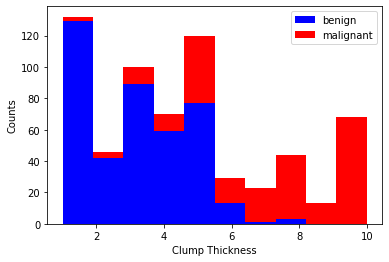

In [11]:
# your code here
cancerType=['benign','malignant']
colors=['b','r']

# clumpThickness=df.

tmp=[]
for i in {2,4}:
    tmp.append(df.ct[df.cl==i])

plt.hist(tmp,label=cancerType,color=colors, stacked=True)
plt.xlabel('Clump Thickness')
plt.ylabel('Counts')
plt.legend()

### Question 6 (15 points)
**Create a scatter plot to visualize the relationship between clump thickness and single epithelial cell size and color each instance red or blue based on whether it's malignant or benign respectively.**

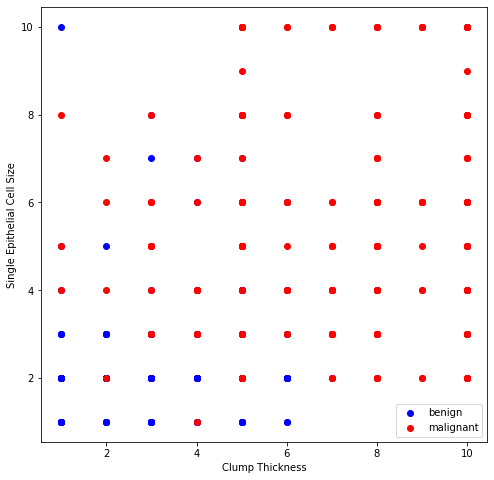

In [12]:
#your code here
cancerType=['benign','malignant']
colors=['b','r']
fig, ax = plt.subplots(figsize=(8,8)) 

ax.scatter(df.ct[df.cl==2], df.secs[df.cl==2], c=colors[0], label=cancerType[0])
ax.scatter(df.ct[df.cl==4], df.secs[df.cl==4], c=colors[1], label=cancerType[1])

ax.set_xlabel('Clump Thickness')
ax.set_ylabel('Single Epithelial Cell Size')
ax.legend()


## SQL

**Note:**
Do not use operators not covered in course lectures .  You should NOT use any SQL concept that was not covered in the lecture, e.g., you should not use operators like MAX, MIN, COUNT, subqueries, correlated subqueries, or any other fancy feature of SQL.  Use of operators which are not allowed will result in points penalty.

**Tip:** By selection a cell and using the Cell menu's cell type you can convert a cell into markdown format which has been done below in the answer spots and tells Jupyter to not treat it like python and instead treat the cell as text.


### Question 7 (15 points) 
**From the sample SQL query problems handout, solve question 9, i.e., find the name of the person who received the highest grade in the “Big Data” course. You should NOT use any SQL concept that was not covered in the lecture, e.g., you should not use operators like MAX, MIN, COUNT, subqueries, correlated subqueries, or any other fancy feature of SQL. This question is intended to encourage you to think in plain simple relational concepts.**

DROP VIEW  IF EXISTS detailtable;
CREATE VIEW DetailTable AS 
SELECT p.id, p.name,p.age, p.address, g.cid,g.grade,c.name as courseName,c.department
FROM People AS p, Grades AS g, Courses AS c
WHERE p.id=g.pid AND c.cid=g.cid;

DROP VIEW  IF EXISTS tableWithoutMaxInBigData;
CREATE VIEW tableWithoutMaxInBigData AS 
SELECT distinct d1.name, d1.grade, d1.courseName
FROM detailtable AS d1, detailtable AS d2
WHERE d1.grade<d2.grade AND d1.courseName='Big Data' And d2.courseName='Big Data';

SELECT DISTINCT d3.name
FROM detailtable AS d3
WHERE d3.courseName='Big Data' AND d3.grade  NOT IN(
SELECT t.grade FROM tableWithoutMaxInBigData AS t);

### Question 8 (5 EC points) 
**Solve question 10 from the sample SQL query problems handout. Same conditions as previous question apply.**


SELECT DISTINCT t3.name
FROM tableWithoutMaxInBigData AS t3
WHERE t3.courseName='Big Data' AND t3.grade  NOT IN(
SELECT t1.grade FROM tableWithoutMaxInBigData AS t1, tableWithoutMaxInBigData AS t2 
WHERE t1.grade<t2.grade AND t1.courseName='Big Data' AND t2.courseName='Big Data');

### Question 9 (5 EC points) 
**From the sample SQL query problems handout, solve question 11, i.e., find the name of people who received a grade of 3.5 or better in every course (given in the Courses table). We do not know how many courses are in the Courses table. If the table contains 3 courses, then we are interested in students who have received a grade of 3.5 or more in each of these 3 courses. If it contains 10 courses, then we are interested in those who have excelled in all these 10 courses. (You get the idea.) Once again, you do NOT need to use (and should not) any fancy SQL feature that was not covered in the lecture. Solve it using clean, simple, relational concepts.**

drop View  if exists studentsTakeAllCourses;
CREATE VIEW studentsTakeAllCourses AS 
select *
from people
where not exists (
	select * 
	from courses
	where not exists 
	(
		select * 
		from grades
		where grades.pid=people.id and grades.cid=courses.cid
	) 
);

select distinct s.name
from studentsTakeAllCourses as s, courses as c, grades as g
where s.id=g.pid and g.cid=c.cid and g.grade>=3.5;

### Question 10 (5 EC points) 
**Solve question 12 from the sample SQL query problems handout.**


select distinct p.name 
from people as p 
where p.name not in 
(select name 
 from detailtable 
 where grade<3.5);

## What to submit

One single Python notebook file containing answers to questions 1-6 as Python code, and answers to questions 7-10 as comments or markdown in the notebook. Thus, the SQL queries will be shown as comments in the notebook. The assignment will be graded by executing your code for questions 1-6 and by manual inspection of solutions to questions 7-10.

**In this and all assignments/projects that submit code, you can assume we will be using `Kernel->Restart & Run All` to evaluate your notebook.  As such the last thing you should do is that to confirm that everythings runs as expected.**